# 1 import Packages

In [1]:
import numpy as np
import xarray as xr
import clim_xai_benchmark as climxai
import matplotlib.pyplot as plt

In [2]:
from clim_xai_benchmark import surrogate_data_generator as clim_sdg

# 2 Generate Grid

In [3]:
lat = np.arange(-90,90,10)
lon = np.arange(-180,180,10)

n_lat = len(lat)
n_lon = len(lon)

In [4]:
mean = xr.DataArray(np.zeros([n_lat, n_lon]), dims = ["lat","lon"], coords ={"lat":lat, "lon":lon})

In [5]:
mean_stack_1 = mean.rename({"lat":"lat_1","lon":"lon_1"}).stack({"feature":["lat_1","lon_1"]}).rename({"feature":"feature_1"})

In [6]:
mean_stack = mean.stack({"feature":["lat","lon"]})

# 3 Generate covariance function

In [7]:
distance = xr.ufuncs.sqrt(xr.ufuncs.square(mean_stack.lon-mean_stack_1.lon_1) + xr.ufuncs.square(mean_stack.lat-mean_stack_1.lat_1))

distance = xr.ufuncs.sqrt(xr.ufuncs.square(mean_stack.lon-mean_stack.lon.rename({"feature":"feature_1"})) + xr.ufuncs.square(mean_stack.lat-mean_stack.lat.rename({"feature":"feature_1"})))

In [8]:
fall_of_distance = 40

In [9]:
covariance = xr.ufuncs.exp(-distance/fall_of_distance)

In [10]:
covariance.unstack().to_netcdf("../data/covariance.nc")

# Generate Data

In [14]:
n_samples = 10**4

In [15]:
data = clim_sdg.xarray_multivariate_normal_distribution(mean_stack, covariance, n_sample=n_samples, feature_dim = "feature")
data = data.unstack()

In [17]:
example_sample_indexes = np.random.randint(0,n_samples, 100 )

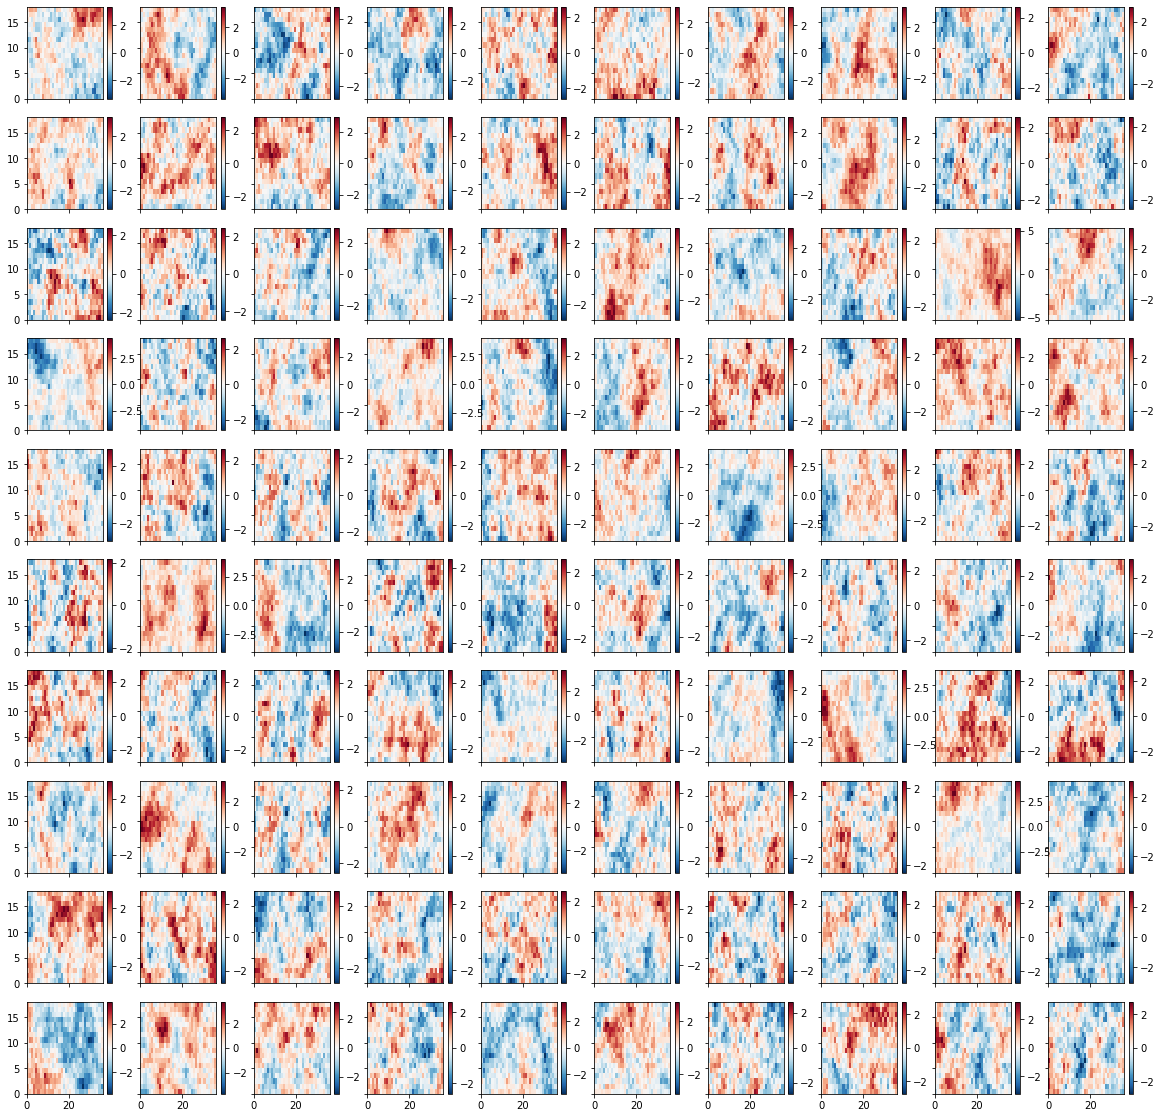

In [21]:
fig, ax = plt.subplots(10,10, figsize=(20,20),sharex=True, sharey=True)

ax_ravel = np.ravel(ax)
for index, example_sample_index in enumerate(example_sample_indexes):
    tmp = data.sel(sample = example_sample_index)
    maximum = np.abs(tmp).max()
    plot = ax_ravel[index].pcolormesh(tmp, vmin=-maximum, vmax= maximum, cmap ="RdBu_r")
    plt.colorbar(plot, ax= ax_ravel[index])

In [22]:
cov_calc_self = clim_sdg.xarray_autocovariance_matrix(data, sample_dim="sample")

In [13]:
data.unstack().to_netcdf("../data/input_data_2.nc")
covariance.unstack().to_netcdf("../data/covariance_2.nc")

NameError: name 'data' is not defined

In [15]:
cov_calc = xr.cov(data,data.rename({"feature":"feature_1"}), dim="sample")

(array([1.64964e+05, 2.25390e+05, 1.62700e+04, 7.09800e+03, 2.61800e+03,
        2.65600e+03, 2.60000e+02, 2.60000e+01, 5.09000e+02, 1.13000e+02]),
 array([-1.26776376e-04,  3.33902319e-06,  1.33454423e-04,  2.63569822e-04,
         3.93685221e-04,  5.23800621e-04,  6.53916020e-04,  7.84031419e-04,
         9.14146819e-04,  1.04426222e-03,  1.17437762e-03]),
 <BarContainer object of 10 artists>)

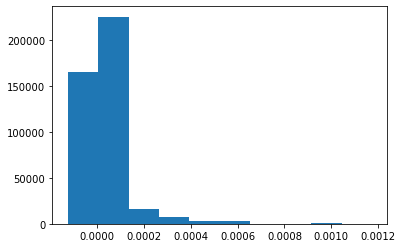

In [18]:
plt.hist((cov_calc-cov_calc_self).values.flatten())

(array([8.50000e+01, 1.86000e+03, 1.76020e+04, 7.71240e+04, 1.45721e+05,
        1.23848e+05, 4.57880e+04, 7.37400e+03, 4.87000e+02, 1.50000e+01]),
 array([-0.00452914, -0.00357778, -0.00262643, -0.00167507, -0.00072372,
         0.00022764,  0.00117899,  0.00213035,  0.00308171,  0.00403306,
         0.00498442]),
 <BarContainer object of 10 artists>)

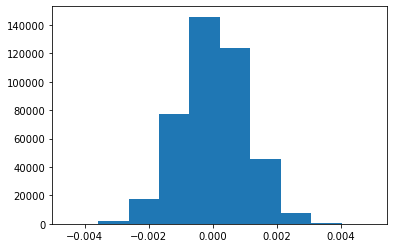

In [25]:
plt.hist((covariance-cov_calc_self).values.flatten())

(array([7.00000e+00, 1.24000e+02, 2.77200e+03, 2.38320e+04, 9.54650e+04,
        1.58145e+05, 1.06298e+05, 2.96650e+04, 3.41000e+03, 1.86000e+02]),
 array([-0.17437762, -0.14330977, -0.11224193, -0.08117408, -0.05010624,
        -0.01903839,  0.01202945,  0.0430973 ,  0.07416514,  0.10523298,
         0.13630083]),
 <BarContainer object of 10 artists>)

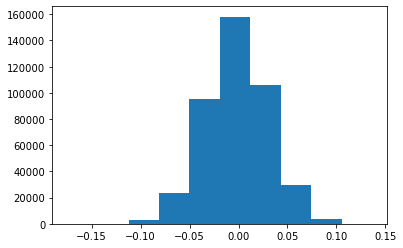

In [17]:
plt.hist((covariance-cov_calc).values.flatten())

In [42]:
data.unstack().to_netcdf("../data/input_data.nc")

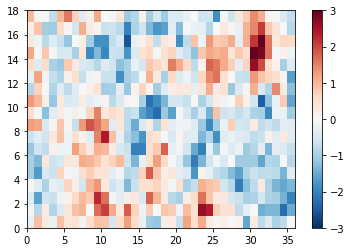

In [39]:
plot = plt.pcolormesh(data.unstack(dim="feature").isel(sample=150), cmap="RdBu_r", vmin=-3,vmax=3)
plt.colorbar(plot)

In [18]:
data_path = "/home/bjoern/Documents/Projects/XAI_Benchmark/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r10i1p1f1/Omon/tos/gn/v20190710"

In [ ]:
surrogate_data_generator

In [19]:
data = xr.open_mfdataset(data_path+"/*.nc")

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
http://xarray.pydata.org/en/stable/user-guide/io.html 
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html

In [10]:
data.groupby(time.dt.year)

NameError: name 'time' is not defined

In [12]:
data.time.dt.year

<xarray.DataArray 'year' (time: 1980)>
array([1850, 1850, 1850, ..., 2014, 2014, 2014])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00

In [ ]:
getattr()